In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
!pip install openpyxl


In [7]:
df = pd.read_excel("/content/1730285881-Airbnb_Open_Data.xlsx")
df.head()

BadZipFile: File is not a zip file

In [10]:
import pandas as pd

file_path = "/content/1730285881-Airbnb_Open_Data.xlsx"

# Load Excel with engine openpyxl
df = pd.read_excel(file_path, engine="openpyxl")

print("✅ File loaded as Excel")
print("\nAvailable columns:", df.columns.tolist())
df.head()


✅ File loaded as Excel

Available columns: ['id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365', 'house_rules', 'license']


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
# Check available columns
print("Available columns:", df.columns.tolist())

# Use 'property_type' if it exists, else fallback to 'room_type'
if 'property_type' in df.columns:
    property_types = df['property_type'].value_counts()
    print("Property Types:\n", property_types)

    property_types.head(10).plot(kind='bar', figsize=(8,4), title="Top Property Types")

elif 'room_type' in df.columns:
    property_types = df['room_type'].value_counts()
    print("Room Types (used instead of property_type):\n", property_types)

    property_types.plot(kind='bar', figsize=(8,4), title="Room Types")

else:
    print("Neither 'property_type' nor 'room_type' exists in this dataset.")


Available columns: ['id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365', 'house_rules', 'license']
Neither 'property_type' nor 'room_type' exists in this dataset.


Room Types:
 room type
Entire home/apt    53701
Private room       46556
Shared room         2226
Hotel room           116
Name: count, dtype: int64


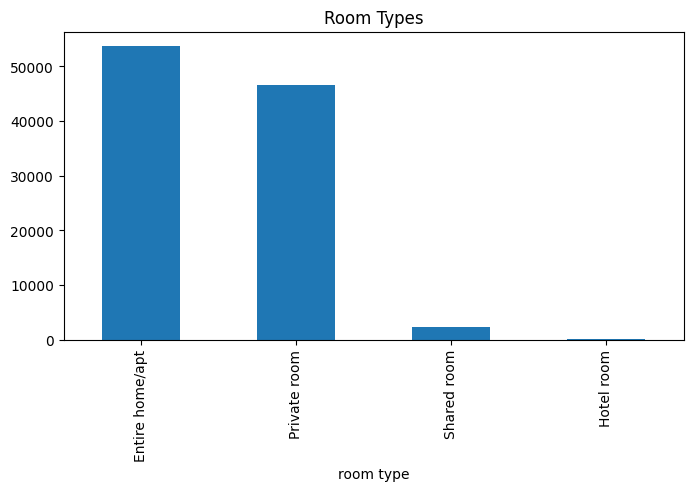

In [ ]:
# 1. What are the different property types in the Dataset?
room_types = df['room type'].value_counts()
print("Room Types:\n", room_types)
room_types.plot(kind='bar', figsize=(8,4), title="Room Types")
plt.show()

Average Review Rate:
    neighbourhood group        room type  review rate number
0                Bronx  Entire home/apt            3.346457
1                Bronx     Private room            3.329706
2                Bronx      Shared room            3.264957
3             Brooklyn  Entire home/apt            3.250378
4             Brooklyn       Hotel room            3.750000
5             Brooklyn     Private room            3.264465
6             Brooklyn      Shared room            3.336983
7            Manhattan  Entire home/apt            3.275807
8            Manhattan       Hotel room            3.500000
9            Manhattan     Private room            3.277576
10           Manhattan      Shared room            3.257459
11              Queens  Entire home/apt            3.349154
12              Queens       Hotel room            3.750000
13              Queens     Private room            3.315585
14              Queens      Shared room            3.377778
15       Staten Is

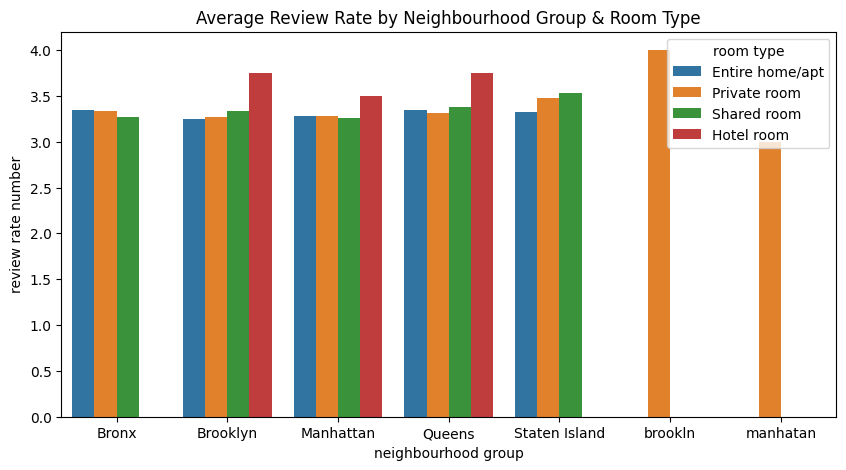

In [ ]:
# 8. Average review rate number by neighbourhood group and room type?
avg_reviews = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().reset_index()
print("Average Review Rate:\n", avg_reviews)
plt.figure(figsize=(10,5))
sns.barplot(data=avg_reviews, x='neighbourhood group', y='review rate number', hue='room type')
plt.title("Average Review Rate by Neighbourhood Group & Room Type")
plt.show()

Top 10 neighbourhoods by avg price:
 neighbourhood
New Dorp                  1045.000000
Chelsea, Staten Island    1042.000000
Fort Wadsworth            1024.000000
Little Neck                817.750000
Jamaica Hills              812.904762
Arden Heights              804.888889
Midland Beach              796.176471
Shore Acres                792.260870
Mill Basin                 775.142857
Riverdale                  768.736842
Name: price, dtype: float64


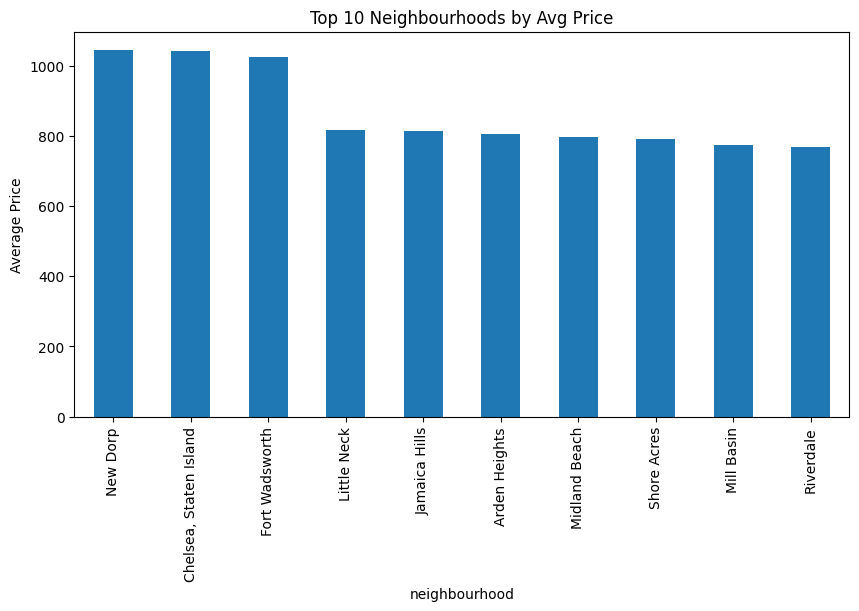

In [ ]:
# 3. Which neighbourhoods have the highest average prices?
avg_price_neigh = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)
print("Top 10 neighbourhoods by avg price:\n", avg_price_neigh)
avg_price_neigh.plot(kind='bar', figsize=(10,5), title="Top 10 Neighbourhoods by Avg Price")
plt.ylabel("Average Price")
plt.show()

Listings by Neighbourhood Group:
 neighbourhood group
Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
Name: count, dtype: int64


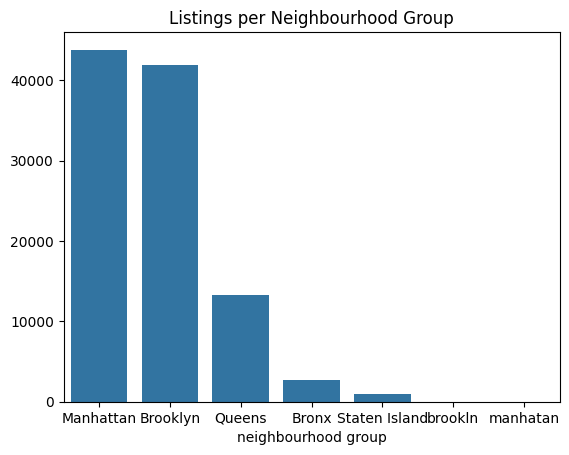

In [ ]:
# 2. Which neighbourhood group has the highest number of listings?
neigh_group = df['neighbourhood group'].value_counts()
print("Listings by Neighbourhood Group:\n", neigh_group)
sns.barplot(x=neigh_group.index, y=neigh_group.values)
plt.title("Listings per Neighbourhood Group")
plt.show()

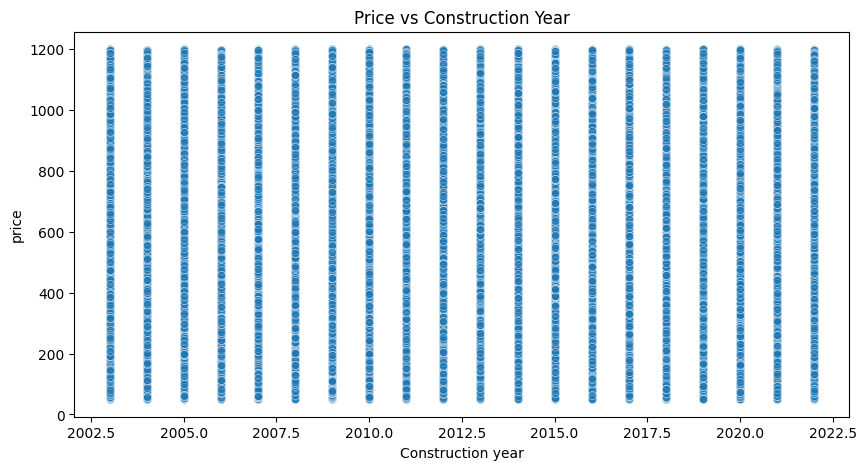

In [ ]:
# 4. Relationship between construction year and price?
if 'Construction year' in df.columns: plt.figure(figsize=(10,5))
sns.scatterplot(x='Construction year', y='price', data=df, alpha=0.6)
plt.title("Price vs Construction Year")
plt.show()

In [ ]:
# 5. Who are the top 10 hosts by calculated host listings count?
top_hosts = df.groupby('host id')['calculated host listings count'].max().sort_values(ascending=False).head(10)
print("Top 10 Hosts by Listings:\n", top_hosts)

Top 10 Hosts by Listings:
 host id
71519005437    332.0
6866703084     332.0
20052088242    332.0
61022727749    332.0
87944211655    332.0
83412943157    332.0
94944787862    332.0
87920381104    332.0
90177049292    332.0
3231719861     332.0
Name: calculated host listings count, dtype: float64


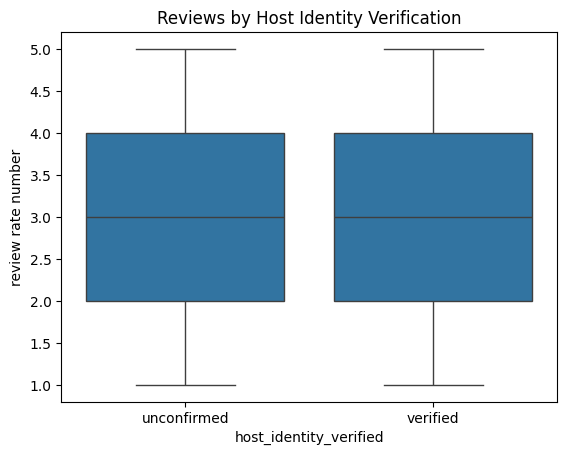

In [ ]:
# 6. Are hosts with verified identities more likely to receive positive reviews? # (using 'host_identity_verified' and 'review rate number')
if 'host_identity_verified' in df.columns and 'review rate number' in df.columns:
  sns.boxplot(x='host_identity_verified', y='review rate number', data=df)
plt.title("Reviews by Host Identity Verification")
plt.show()

Correlation between Price and Service Fee:
                 price  service fee
price        1.000000     0.999991
service fee  0.999991     1.000000


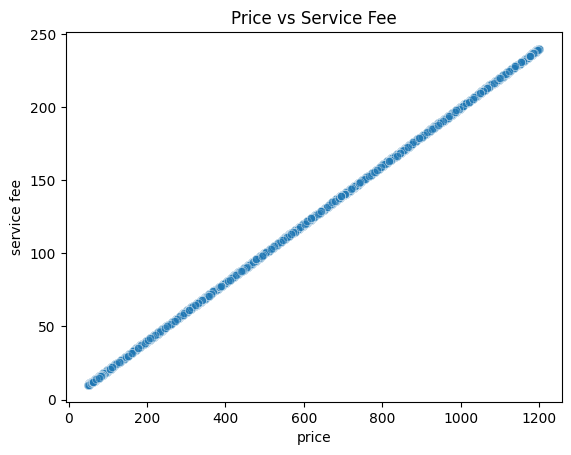

In [11]:
# 7. Correlation between price and service fee?
if 'service fee' in df.columns:
  corr = df[['price', 'service fee']].corr()
  print("Correlation between Price and Service Fee:\n", corr)
  sns.scatterplot(x='price', y='service fee', data=df, alpha=0.5)
  plt.title("Price vs Service Fee")
  plt.show()

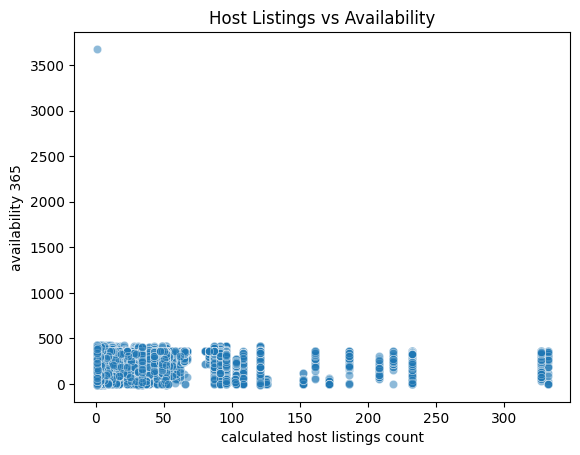

Correlation between Listings Count and Availability:
                                 calculated host listings count  \
calculated host listings count                        1.000000   
availability 365                                      0.159194   

                                availability 365  
calculated host listings count          0.159194  
availability 365                        1.000000  


In [12]:
# 9. Do hosts with higher listing counts maintain higher availability?
sns.scatterplot(x='calculated host listings count', y='availability 365', data=df, alpha=0.5)
plt.title("Host Listings vs Availability")
plt.show()
corr_availability = df[['calculated host listings count', 'availability 365']].corr()
print("Correlation between Listings Count and Availability:\n", corr_availability)